In [1]:
from matminer.datasets import load_dataset
from matminer.featurizers.composition import ElementProperty
from pymatgen.core import Composition
from matminer.featurizers.conversions import StrToComposition
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

df = load_dataset("expt_gap")

print(df.head())
print(df.columns)
print(len(df))

m:\Escritorio\proyecto aa\EntornoVirtual\Lib\site-packages\matminer\__init__.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


        formula  gap expt
0  Hg0.7Cd0.3Te      0.35
1          CuBr      3.08
2           LuP      1.30
3      Cu3SbSe4      0.40
4           ZnO      3.44
Index(['formula', 'gap expt'], dtype='object')
6354


In [2]:
from pymatgen.core import Composition
from matminer.featurizers.structure import (
    SiteStatsFingerprint,
    BondFractions,
    RadialDistributionFunction,
    StructuralComplexity,
    StructuralHeterogeneity,
    GlobalSymmetryFeatures
)
from matminer.featurizers.site import CrystalNNFingerprint




In [3]:
from matminer.featurizers.conversions import StrToComposition
df = StrToComposition().featurize_dataframe(df, "formula")

ep_feat = ElementProperty.from_preset("magpie")
df = ep_feat.featurize_dataframe(df, "composition", ignore_errors=True)


StrToComposition:   0%|          | 0/6354 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/6354 [00:00<?, ?it/s]

In [6]:
featurizers = [
    BondFractions(), 
    RadialDistributionFunction(),
    StructuralComplexity(),
    GlobalSymmetryFeatures(),
    StructuralHeterogeneity(),
    SiteStatsFingerprint(CrystalNNFingerprint.from_preset("ops") ,stats=("mean", "std"))
]

In [8]:
df

,formula,gap expt,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Hg0.7Cd0.3Te,0.35,"(Hg, Cd, Te)",48.0,80.0,32.0,61.200000,13.160000,52.0,70.0,...,0.000000,0.000000,0.000000,0.000000,152.0,194.0,42.0,163.200000,11.200000,152.0
1,CuBr,3.08,"(Cu, Br)",29.0,35.0,6.0,32.000000,3.000000,29.0,64.0,...,0.000000,0.000000,0.000000,0.000000,64.0,225.0,161.0,144.500000,80.500000,64.0
2,LuP,1.30,"(Lu, P)",15.0,71.0,56.0,43.000000,28.000000,15.0,41.0,...,0.002247,0.001124,0.001124,0.000000,2.0,194.0,192.0,98.000000,96.000000,2.0
3,Cu3SbSe4,0.40,"(Cu, Sb, Se)",29.0,51.0,22.0,34.250000,4.187500,34.0,64.0,...,0.000000,0.000000,0.000000,0.000000,14.0,225.0,211.0,112.125000,98.125000,14.0
4,ZnO,3.44,"(Zn, O)",8.0,30.0,22.0,19.000000,11.000000,8.0,69.0,...,0.000000,0.000000,0.000000,0.000000,12.0,194.0,182.0,103.000000,91.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6349,Tm2MgTl,0.00,"(Tm, Mg, Tl)",12.0,81.0,69.0,57.750000,22.875000,69.0,37.0,...,0.000000,0.000000,0.000000,0.000000,194.0,194.0,0.0,194.000000,0.000000,194.0
6350,Nb5Ga4,0.00,"(Nb, Ga)",31.0,41.0,10.0,36.555556,4.938272,41.0,47.0,...,0.000000,0.000000,0.000000,0.000000,64.0,229.0,165.0,155.666667,81.481481,229.0
6351,Tb2Sb5,0.00,"(Tb, Sb)",51.0,65.0,14.0,55.000000,5.714286,51.0,29.0,...,0.000000,0.000000,0.000000,0.000000,166.0,194.0,28.0,174.000000,11.428571,166.0
6352,Lu2AlTc,0.00,"(Lu, Al, Tc)",13.0,71.0,58.0,49.500000,21.500000,71.0,41.0,...,0.002247,0.001124,0.001124,0.002247,194.0,225.0,31.0,201.750000,11.625000,194.0


In [16]:
df.columns

Index(['formula', 'gap expt', 'composition', 'MagpieData minimum Number',
       'MagpieData maximum Number', 'MagpieData range Number',
       'MagpieData mean Number', 'MagpieData avg_dev Number',
       'MagpieData mode Number', 'MagpieData minimum MendeleevNumber',
       ...
       'MagpieData range GSmagmom', 'MagpieData mean GSmagmom',
       'MagpieData avg_dev GSmagmom', 'MagpieData mode GSmagmom',
       'MagpieData minimum SpaceGroupNumber',
       'MagpieData maximum SpaceGroupNumber',
       'MagpieData range SpaceGroupNumber', 'MagpieData mean SpaceGroupNumber',
       'MagpieData avg_dev SpaceGroupNumber',
       'MagpieData mode SpaceGroupNumber'],
      dtype='object', length=135)

In [58]:
from sklearn.model_selection import train_test_split

y = df["gap expt"].drop(1569)
X  =df[df.columns[3:]].drop(1569)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [75]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE:{mae:.3f}")
print(rf"$R^2$ = {r2:.3f}")

MAE:0.353
$R^2$ = 0.827


<Axes: >

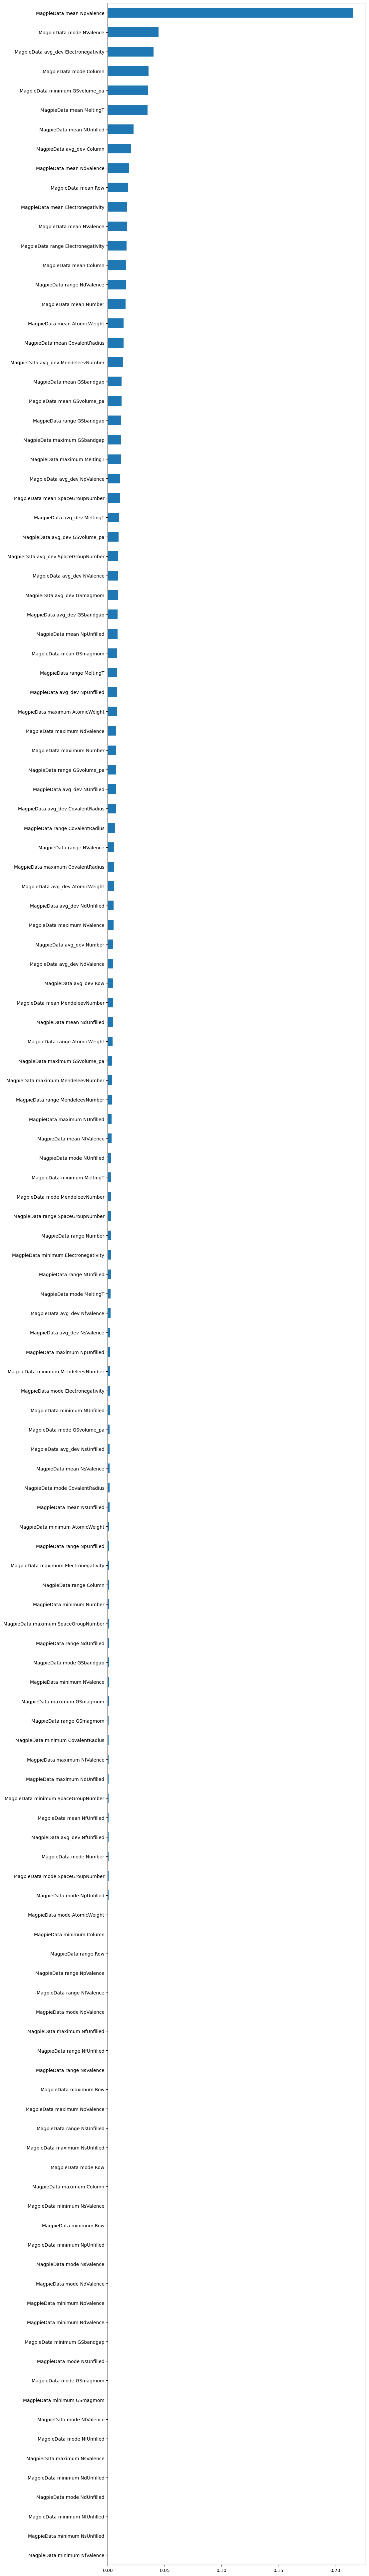

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10,100))
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')



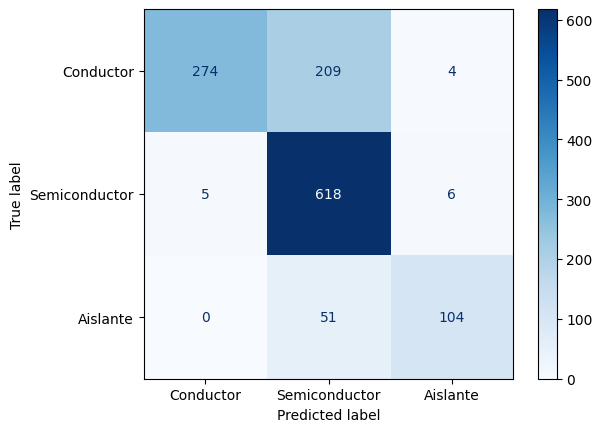

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def gap(gap):
    if gap < 0.1:
        return "Conductor"
    elif gap < 3:
        return "Semiconductor"
    else:
        return "Aislante"
    
y_test_cat = [gap(val) for val in y_test]
y_pred_cat = [gap(val) for val in y_pred]

cm  = confusion_matrix(y_test_cat, y_pred_cat, labels = ["Conductor","Semiconductor","Aislante"])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Conductor", "Semiconductor", "Aislante"])
disp.plot(cmap="Blues")